In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
from scipy import stats
from scipy.stats import weibull_min

In [31]:
kiosks_df = pd.read_csv('../../data/processed/Kiosk_with_LatLong.csv')

# Reset the index of the DataFrame
kiosks_df.reset_index(drop=True, inplace=True)

display(kiosks_df)

,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
0,2707,Rainey St @ Cummings,active,1 Rainey St,9,2022-03-04T10:38:00.000,2856,9,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,NaN,30.255906,-97.739949
1,3838,Nueces & 26th,active,600 W. 26th St.,9,2021-01-04T00:00:00.000,2860,9,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,NaN,30.290680,-97.742920
2,4051,10th & Red River,active,699 East 10th Street,1,2021-01-04T00:00:00.000,2856,1,32686.0,paid_parking,13.0,solar,40.0,5.0,NaN,NaN,30.270240,-97.735780
3,4061,Lakeshore @ Austin Hostel,active,2200 S Lakeshore Blvd,3,2021-01-04T00:00:00.000,3256,3,32692.0,nonmetered_parking,15.0,solar,45.0,5.0,NaN,NaN,30.244720,-97.723360
4,2494,2nd & Congress,active,151 E. 2nd St,9,2021-01-04T00:00:00.000,2856,9,16733.0,paid_parking,15.0,solar,45.0,5.0,NaN,NaN,30.264080,-97.743550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,4059,Nash Hernandez @ RBJ South,active,1316 Festival Beach Rd,3,2021-01-04T00:00:00.000,2857,3,32693.0,nonmetered_parking,13.0,solar,40.0,5.0,NaN,NaN,30.252000,-97.734600
70,4060,Red River/Cesar Chavez @ The Fairmont,active,101 Red River St.,9,2021-01-04T00:00:00.000,2856,9,32691.0,sidewalk,13.0,solar,40.0,5.0,NaN,NaN,30.262140,-97.738700
71,4062,Lakeshore & Pleasant Valley,active,2525 South Lakeshore Boulevard,3,2021-01-04T00:00:00.000,3256,3,32711.0,nonmetered_parking,18.0,solar,55.0,5.0,NaN,NaN,30.242580,-97.717260
72,4699,East 5th/Shady @ Eastside Bus Plaza,active,5104 East 5th. Street,3,2021-07-27T08:25:00.000,2857,3,32522.0,sidewalk,10.0,solar,15.0,10.0,NaN,NaN,30.252120,-97.698070


Distance DataFrame:


,Start_Kiosk_ID,End_Kiosk_ID,Start_Lat,Start_Long,End_Lat,End_Long,Distance
0,3390,3619,30.26754,-97.74154,30.26822,-97.74285,0.146782
1,3390,2495,30.26754,-97.74154,30.26634,-97.74378,0.253146
2,3390,2565,30.26754,-97.74154,30.26735,-97.73933,0.213291
3,3390,2496,30.26754,-97.74154,30.26980,-97.74186,0.253173
4,3390,2562,30.26754,-97.74154,30.26912,-97.73986,0.238531
...,...,...,...,...,...,...,...
5397,3791,4061,30.29439,-97.78375,30.24472,-97.72336,8.008678
5398,3791,3790,30.29439,-97.78375,30.27807,-97.77272,2.101143
5399,3791,2823,30.29439,-97.78375,30.25630,-97.71007,8.246248
5400,3791,4062,30.29439,-97.78375,30.24258,-97.71726,8.600176


Minimum latitude: 30.24258
Maximum latitude: 30.29439
Minimum longitude: -97.78375
Maximum longitude: -97.69807
Minimum distance: 0.14678184557924742 km
Maximum distance: 9.475834037654108 km
Center Lat: 30.267487662162164
Center Long: -97.74193387837838


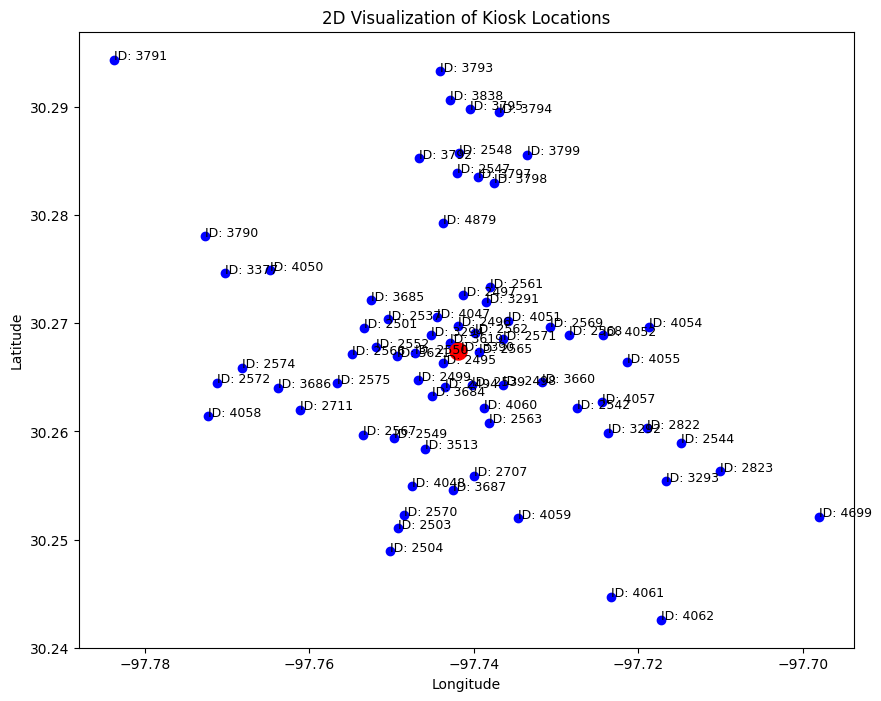

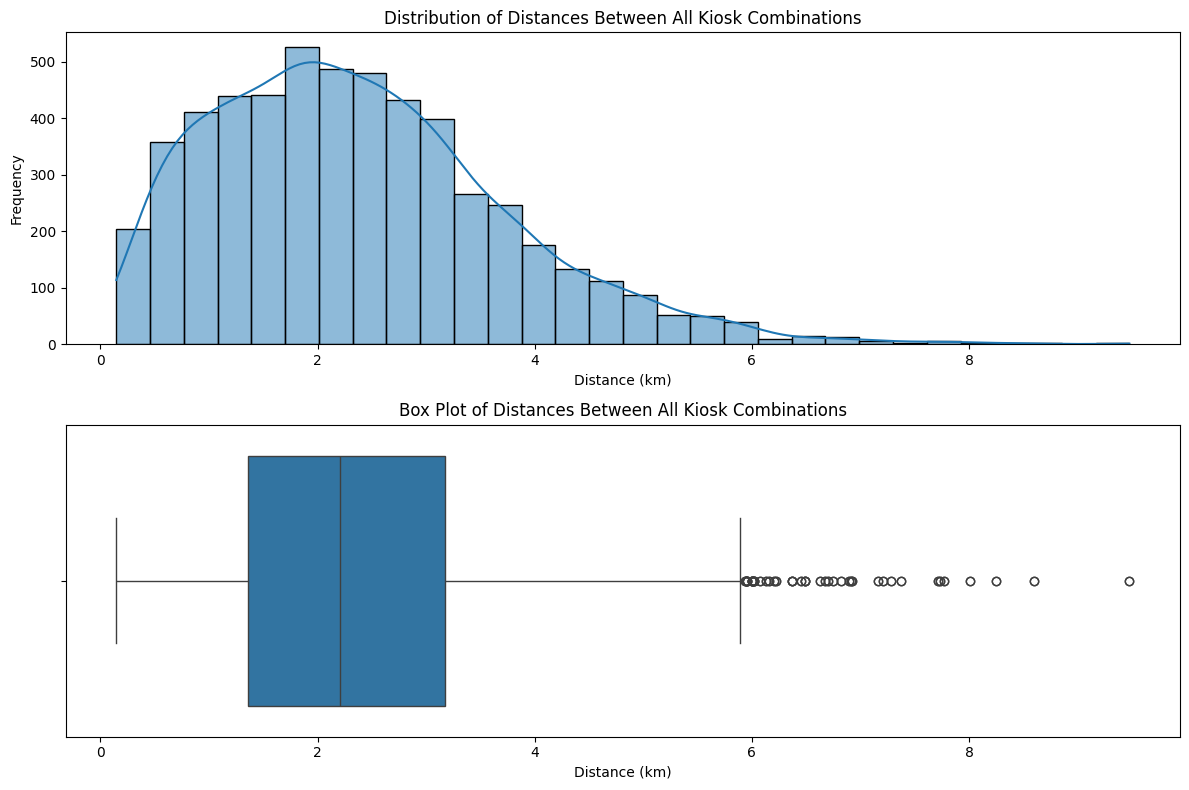

In [32]:
# Haversine function to calculate distance
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r


# Calculating center coordinates (average latitude and longitude)
center_lat = kiosks_df['latitude'].mean()
center_long = kiosks_df['longitude'].mean()

# Calculating distance of each Start_Kiosk_ID from the center
kiosks_df['Distance_From_Center'] = kiosks_df.apply(
    lambda row: haversine(center_long, center_lat, row['longitude'], row['latitude']), axis=1)

# Sorting kiosks_df based on Distance_From_Center
kiosks_df = kiosks_df.sort_values(by='Distance_From_Center')

# Preparing DataFrame for the result
result = []
for i in range(len(kiosks_df)):
    for j in range(len(kiosks_df)):
        if i != j: # Avoid calculating distance from a point to itself
            start_id = kiosks_df.iloc[i]['kiosk_id']
            end_id = kiosks_df.iloc[j]['kiosk_id']
            start_lat = kiosks_df.iloc[i]['latitude']
            start_lon = kiosks_df.iloc[i]['longitude']
            end_lat = kiosks_df.iloc[j]['latitude']
            end_lon = kiosks_df.iloc[j]['longitude']
            distance = haversine(start_lon, start_lat, end_lon, end_lat)
            result.append([start_id, end_id, start_lat, start_lon, end_lat, end_lon, distance])

# Converting result into DataFrame
columns = ["Start_Kiosk_ID", "End_Kiosk_ID", "Start_Lat", "Start_Long", "End_Lat", "End_Long", "Distance"]
distance_df = pd.DataFrame(result, columns=columns)

# Displaying the DataFrame
print("Distance DataFrame:")
display(distance_df)

# Minimum and maximum latitude
min_lat = distance_df[['Start_Lat', 'End_Lat']].min().min()
max_lat = distance_df[['Start_Lat', 'End_Lat']].max().max()

# Minimum and maximum longitude
min_long = distance_df[['Start_Long', 'End_Long']].min().min()
max_long = distance_df[['Start_Long', 'End_Long']].max().max()

# Minimum and maximum distance
min_distance = distance_df['Distance'].min()
max_distance = distance_df['Distance'].max()

# Print the results
print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)
print("Minimum longitude:", min_long)
print("Maximum longitude:", max_long)
print("Minimum distance:", min_distance, "km")
print("Maximum distance:", max_distance, "km")
print("Center Lat:", center_lat)
print("Center Long:", center_long)

# Visualizing in 2D with an interactive plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of the latitude and longitude with Kiosk IDs
for index, row in kiosks_df.iterrows():
    ax.scatter(row['longitude'], row['latitude'], c='blue', marker='o')
    ax.text(row['longitude'], row['latitude'], f'ID: {row["kiosk_id"]}', fontsize=9)

# Mark the center point
ax.scatter(center_long, center_lat, c='red', marker='o', s=150)

# Adding labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Visualization of Kiosk Locations')

plt.show()

plt.figure(figsize=(12, 8))

# Histogram for the distribution of distances
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.histplot(distance_df['Distance'], kde=True, bins=30)
plt.title('Distribution of Distances Between All Kiosk Combinations')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

# Box plot for understanding the spread and identifying outliers
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.boxplot(x=distance_df['Distance'])
plt.title('Box Plot of Distances Between All Kiosk Combinations')
plt.xlabel('Distance (km)')

plt.tight_layout()  # Adjust layout to make sure there's no overlap
plt.show()

In [33]:
#Testing distributions

data = distance_df['Distance']

# List of distributions to test
distributions = [stats.norm, stats.expon, stats.lognorm, stats.weibull_min, stats.weibull_max]


# Store the results
results = []

results2 = []

# Fit the data to each distribution and calculate AIC and BIC
for distribution in distributions:
    # Fit distribution to data
    params = distribution.fit(data)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate the log likelihood
    log_likelihood = np.sum(distribution.logpdf(data, *arg, loc=loc, scale=scale))

    # Calculate AIC and BIC
    aic = -2*log_likelihood + 2*len(params)
    bic = -2*log_likelihood + len(params)*np.log(len(data))

    # Append results including parameter values
    results.append((distribution.name, *arg, loc, scale, aic, bic))

    # Append results
    results2.append((distribution.name, aic, bic))

# Convert results to DataFrame
results2_df = pd.DataFrame(results2, columns=['Distribution', 'AIC', 'BIC'])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Distribution', 'Arg', 'Loc', 'Scale', 'AIC', 'BIC'])

# Sort by AIC and BIC
sorted_results_aic = results_df.sort_values(by='AIC')
sorted_results_bic = results_df.sort_values(by='BIC')

# Print AIC and BIC values for all distribution fits
print("\nAIC and BIC values for all tested distributions:")
print(results_df)
print(results2_df)


AIC and BIC values for all tested distributions:
  Distribution       Arg       Loc         Scale           AIC           BIC
0         norm  2.374024  1.351293  18586.886241  18600.075290           NaN
1        expon  0.146782  2.227242  19459.453801  19472.642850           NaN
2      lognorm  0.354480 -1.421844      3.567455  17872.439267  17892.222841
3  weibull_min  1.708664  0.113473      2.531009  17678.362417  17698.145990
4  weibull_max  0.479473  9.475834      1.450396  43719.775054  43739.558627
  Distribution           AIC           BIC
0         norm  18586.886241  18600.075290
1        expon  19459.453801  19472.642850
2      lognorm  17872.439267  17892.222841
3  weibull_min  17678.362417  17698.145990
4  weibull_max  43719.775054  43739.558627


In [34]:
# Initialize an empty list to store results
results = []

# Iterate over each distribution
for distribution in distributions:
    # Fit distribution to data
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate the log likelihood
    if len(arg) > 0:  # If there are shape parameters
        log_likelihood = np.sum(distribution.logpdf(data, *arg, loc=loc, scale=scale))
    else:
        log_likelihood = np.sum(distribution.logpdf(data, loc=loc, scale=scale))

    # Calculate AIC and BIC
    k = len(params)  # Number of parameters
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + k * np.log(len(data))

    # Construct a list of parameters for each distribution
    params_list = [distribution.name]
    params_list.extend(arg) if arg else params_list.append(None)
    params_list.extend([loc, scale, aic, bic])

    # Append to results
    results.append(params_list)

# Create DataFrame
columns = ['Distribution', 'Arg', 'Loc', 'Scale', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

print("\nAIC and BIC values for all tested distributions with parameters:")
print(results_df)



AIC and BIC values for all tested distributions with parameters:
  Distribution       Arg       Loc     Scale           AIC           BIC
0         norm       NaN  2.374024  1.351293  18586.886241  18600.075290
1        expon       NaN  0.146782  2.227242  19459.453801  19472.642850
2      lognorm  0.354480 -1.421844  3.567455  17872.439267  17892.222841
3  weibull_min  1.708664  0.113473  2.531009  17678.362417  17698.145990
4  weibull_max  0.479473  9.475834  1.450396  43719.775054  43739.558627


Weibull-min KS Statistic: 0.02014850867972956
Weibull-min KS P-value: 0.02456281618867151
-1 SD Equivalent Weibull: 0.9069817439015526 km
+1 SD Equivalent Weibull: 3.61510003190158 km
SSD QQ Plot 0.2132450648373859


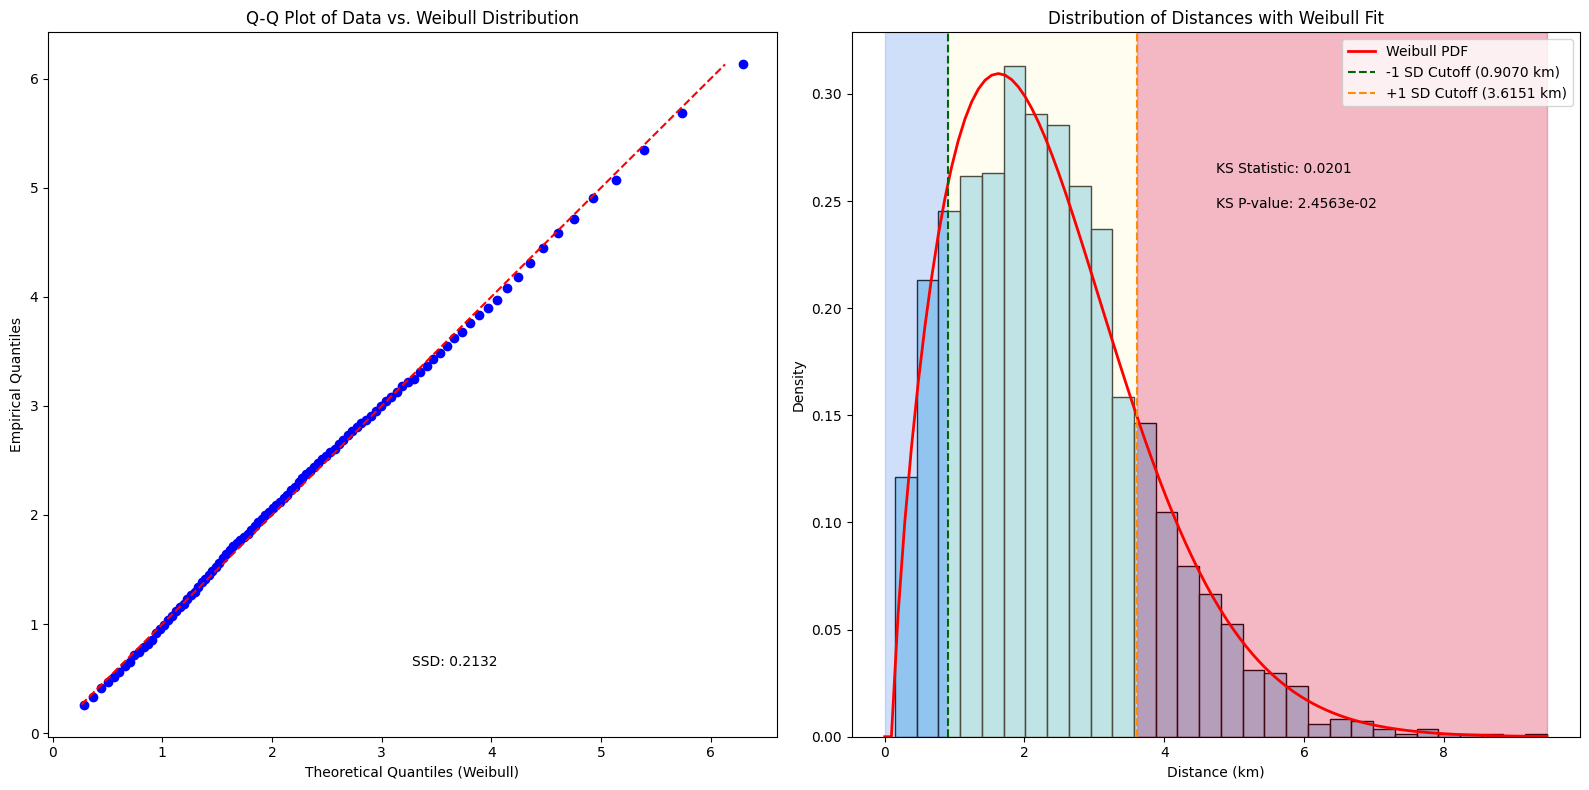

In [36]:
#Testing Weibull-min

# Extracting distance data
data = distance_df['Distance']

# Weibull distribution fitting
weibull_min_params = stats.weibull_min.fit(data)
shape_param, loc, scale_param = weibull_min_params

shape_param, scale_param

# Perform KS test
weibull_min_ks_statistic, weibull_min_ks_pvalue = stats.kstest(data, 'weibull_min', args=weibull_min_params)

print(f"Weibull-min KS Statistic: {weibull_min_ks_statistic}")
print(f"Weibull-min KS P-value: {weibull_min_ks_pvalue}")

# Function to calculate cutoffs
def weibull_cutoffs(shape, scale, lower_percentile, upper_percentile):
    lower_cutoff = weibull_min.ppf(lower_percentile, shape, scale=scale)
    upper_cutoff = weibull_min.ppf(upper_percentile, shape, scale=scale)
    return lower_cutoff, upper_cutoff

# Calculate cutoffs for -1 SD and +1 SD equivalent in Weibull distribution
minus_one_sd_cutoff, plus_one_sd_cutoff = weibull_cutoffs(shape_param, scale_param, 0.159, 0.841)

print(f"-1 SD Equivalent Weibull: {minus_one_sd_cutoff} km")
print(f"+1 SD Equivalent Weibull: {plus_one_sd_cutoff} km")

# Prepare data for the Weibull Q-Q plot
weibull_quantiles = stats.weibull_min.ppf(np.linspace(0.01, 0.99, 100), *weibull_min_params)
data_quantiles = np.percentile(data, np.linspace(1, 99, 100))

# Calculate the sum of squared differences for Weibull
ssd_weibull = np.sum((weibull_quantiles - data_quantiles)**2)

print(f"SSD QQ Plot {ssd_weibull}")

# Create a figure with 2 subplots
plt.figure(figsize=(16, 8))

# Weibull Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(weibull_quantiles, data_quantiles, color='blue')
plt.plot([min(data_quantiles), max(data_quantiles)], [min(data_quantiles), max(data_quantiles)], 'r--')
plt.xlabel('Theoretical Quantiles (Weibull)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot of Data vs. Weibull Distribution')
plt.text(0.5, 0.1, f"SSD: {ssd_weibull:.4f}", transform=plt.gca().transAxes)

# Histogram with Weibull PDF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data, kde=False, bins=30, stat='density', color='skyblue')
x = np.linspace(0, data.max(), 100)
y = weibull_min.pdf(x, *weibull_min_params)
plt.plot(x, y, 'r-', lw=2, label='Weibull PDF')
plt.axvline(minus_one_sd_cutoff, color='darkgreen', linestyle='--', 
            label=f'-1 SD Cutoff ({minus_one_sd_cutoff:.4f} km)')
plt.axvline(plus_one_sd_cutoff, color='darkorange', linestyle='--', 
            label=f'+1 SD Cutoff ({plus_one_sd_cutoff:.4f} km)')
plt.axvspan(0, minus_one_sd_cutoff, color='#6495ED', alpha=0.3)
plt.axvspan(minus_one_sd_cutoff, plus_one_sd_cutoff, color='#FFFACD', alpha=0.3)
plt.axvspan(plus_one_sd_cutoff, data.max(), color='#DC143C', alpha=0.3)
plt.title('Distribution of Distances with Weibull Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()


# Add KS statistic and p-value text
plt.text(0.5, 0.8, f"KS Statistic: {weibull_min_ks_statistic:.4f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f"KS P-value: {weibull_min_ks_pvalue:.4e}", transform=plt.gca().transAxes)
# plt.text(0.5, 0.7, f"Mean Bootstrapping P-value: {p_value_mean:.4e}", transform=plt.gca().transAxes)

# Show the combined plot
plt.tight_layout()
plt.show()

KS Statistic for Normal Distribution: 0.051954645029159516
KS P-value for Normal Distribution: 4.1070053461541826e-13
-1 SD: 1.022730464054321
+1 SD: 3.7253168223670707
Completed 20 out of 100 bootstrap iterations.
Completed 40 out of 100 bootstrap iterations.
Completed 60 out of 100 bootstrap iterations.
Completed 80 out of 100 bootstrap iterations.
Completed 100 out of 100 bootstrap iterations.
Mean p-value from bootstrapping for Normal Distribution: 4.909439504143268e-13


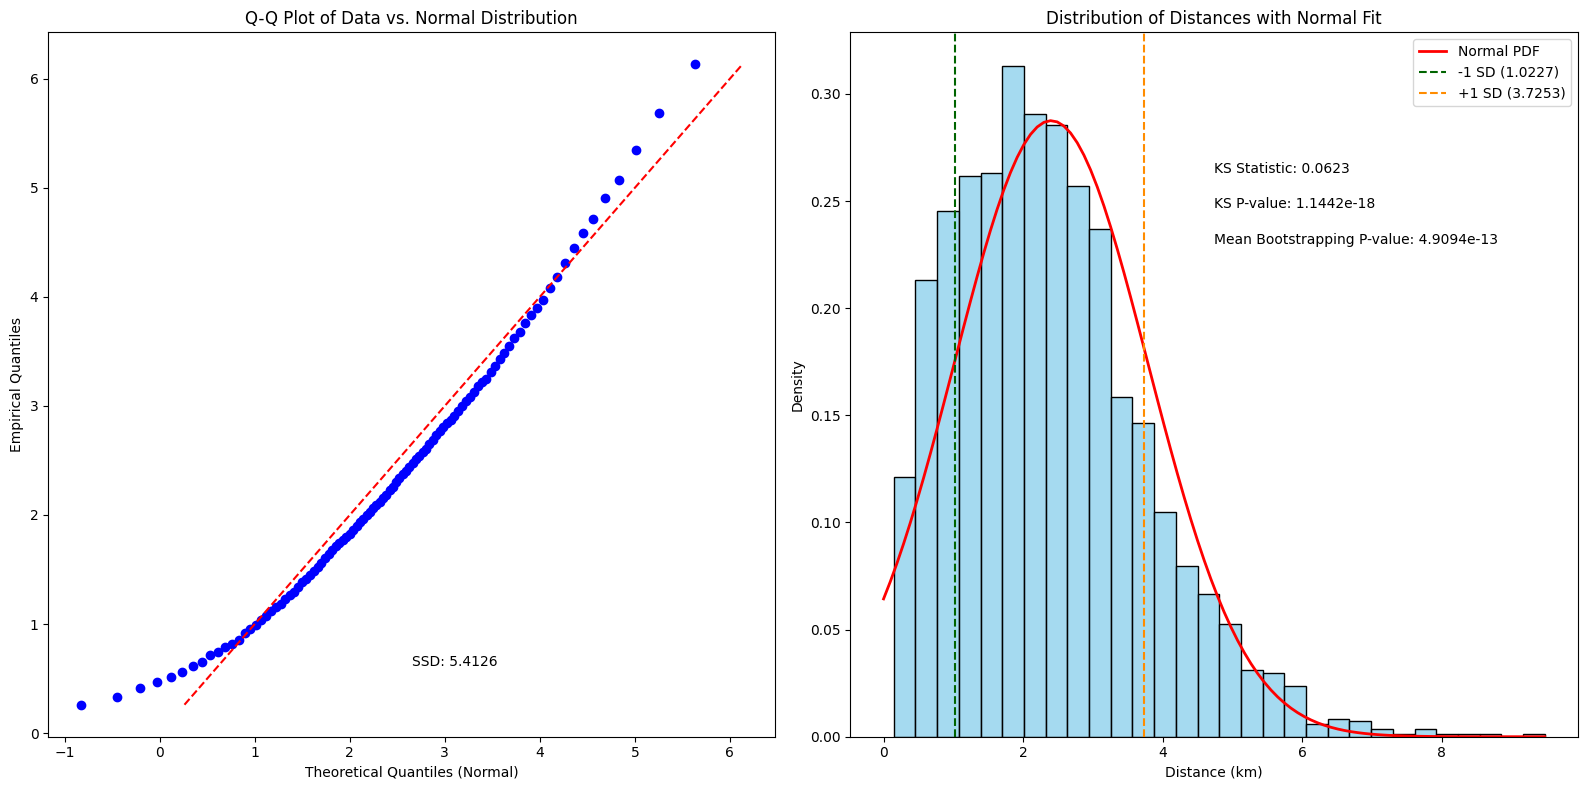

In [ ]:
#Testing normal distribution
#With such a low p-value we can confirm that this data does not fit a normal distribution

# Extracting distance data
data = distance_df['Distance']

# Fit the normal distribution to the data
norm_params = stats.norm.fit(data)  # This will return mean (loc) and standard deviation (scale)

# Perform the KS test for the normal distribution
norm_ks_statistic, norm_ks_pvalue = stats.kstest(data, 'norm', args=norm_params)

print(f"KS Statistic for Normal Distribution: {norm_ks_statistic}")
print(f"KS P-value for Normal Distribution: {norm_ks_pvalue}")

# mean and standard deviation from norm_params
norm_mean, norm_std_dev = norm_params

# Calculate -1 SD and +1 SD
norm_minus_one_sd = norm_mean - norm_std_dev
norm_plus_one_sd = norm_mean + norm_std_dev

print(f"-1 SD: {norm_minus_one_sd}")
print(f"+1 SD: {norm_plus_one_sd}")

#######################################################
bootstrap_samples = 100
normal_bootstrap_results = []

for i in range(bootstrap_samples):
    # Sampling with replacement
    normal_sample = data.sample(len(data), replace=True)
    
    # Fit the normal distribution to the bootstrap sample
    norm_params = stats.norm.fit(normal_sample)
    
    # Perform the KS test for the normal distribution
    norm_ks_statistic, norm_ks_pvalue = stats.kstest(normal_sample, 'norm', args=norm_params)
    
    # Store the p-value
    normal_bootstrap_results.append(norm_ks_pvalue)

    # Print a statement every 100 iterations to track progress
    if (i+1) % 20 == 0:
        print(f"Completed {i+1} out of {bootstrap_samples} bootstrap iterations.")

# Assess the distribution of p-values
p_value_mean = np.mean(normal_bootstrap_results)

print(f"Mean p-value from bootstrapping for Normal Distribution: {p_value_mean}")

####################################################

# Prepare data for the Normal Q-Q plot
normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, 100), *norm_params)
data_quantiles = np.percentile(data, np.linspace(1, 99, 100))

# Calculate the sum of squared differences for Weibull
ssd_normal = np.sum((normal_quantiles - data_quantiles)**2)

# Create a figure with 2 subplots
plt.figure(figsize=(16, 8))

# Normal Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(normal_quantiles, data_quantiles, color='blue')
plt.plot([min(data_quantiles), max(data_quantiles)], [min(data_quantiles), max(data_quantiles)], 'r--')
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot of Data vs. Normal Distribution')
plt.text(0.5, 0.1, f"SSD: {ssd_normal:.4f}", transform=plt.gca().transAxes)

# Histogram with Normal PDF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data, kde=False, bins=30, stat='density', color='skyblue')
x = np.linspace(0, data.max(), 100)
y = stats.norm.pdf(x, *norm_params)
plt.plot(x, y, 'r-', lw=2, label='Normal PDF')
plt.axvline(norm_minus_one_sd, color='darkgreen', linestyle='--', 
            label=f'-1 SD ({norm_minus_one_sd:.4f})')
plt.axvline(norm_plus_one_sd, color='darkorange', linestyle='--', 
            label=f'+1 SD ({norm_plus_one_sd:.4f})')
plt.title('Distribution of Distances with Normal Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()

# Add KS statistic and mean p-value from bootstrapping
mean_p_value = np.mean(normal_bootstrap_results)
plt.text(0.5, 0.8, f"KS Statistic: {norm_ks_statistic:.4f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f"KS P-value: {norm_ks_pvalue:.4e}", transform=plt.gca().transAxes)
plt.text(0.5, 0.7, f"Mean Bootstrapping P-value: {mean_p_value:.4e}", transform=plt.gca().transAxes)

# Show the combined plot
plt.tight_layout()
plt.show()

KS Statistic for Exponential Distribution: 0.1698406309865918
KS P-value for Exponential Distribution: 1.0660245589170479e-136
Completed 20 out of 100 bootstrap iterations.
Completed 40 out of 100 bootstrap iterations.
Completed 60 out of 100 bootstrap iterations.
Completed 80 out of 100 bootstrap iterations.
Completed 100 out of 100 bootstrap iterations.
Mean p-value from bootstrapping for Exponential Distribution: 4.5033777424882855e-123


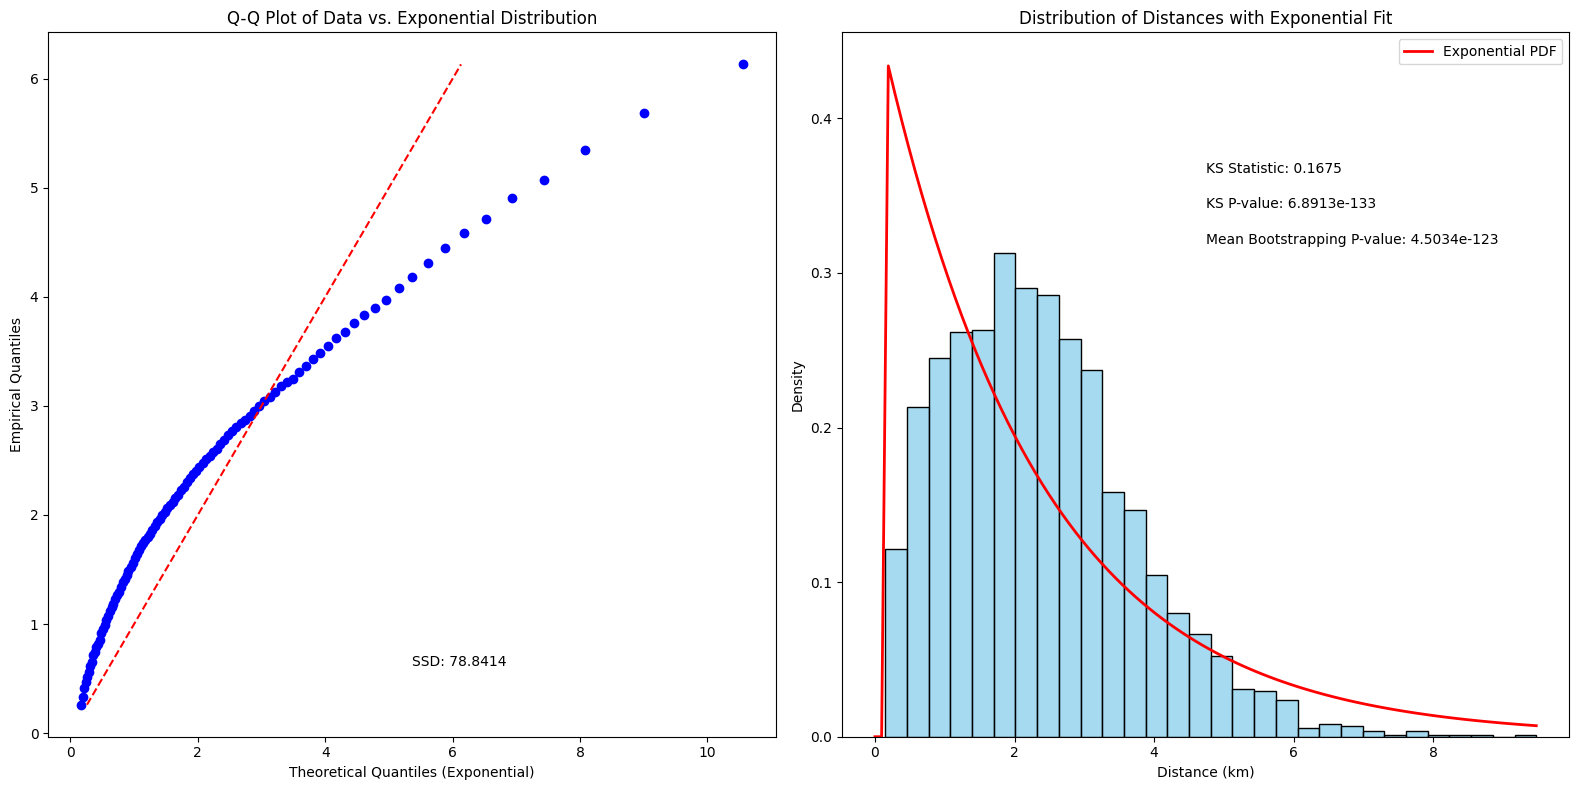

In [ ]:
# Fit the exponential distribution to the data
expon_params = stats.expon.fit(data)  # This will return loc and scale

# Perform the KS test for the exponential distribution
expon_ks_statistic, expon_ks_pvalue = stats.kstest(data, 'expon', args=expon_params)

print(f"KS Statistic for Exponential Distribution: {expon_ks_statistic}")
print(f"KS P-value for Exponential Distribution: {expon_ks_pvalue}")

# Bootstrapping for exponential distribution
bootstrap_samples = 100
exponential_bootstrap_results = []

for i in range(bootstrap_samples):
    # Sampling with replacement
    expon_sample = data.sample(len(data), replace=True)
    
    # Fit the exponential distribution to the bootstrap sample
    expon_params = stats.expon.fit(expon_sample)
    
    # Perform the KS test for the exponential distribution
    expon_ks_statistic, expon_ks_pvalue = stats.kstest(expon_sample, 'expon', args=expon_params)
    
    # Store the p-value
    exponential_bootstrap_results.append(expon_ks_pvalue)

    # Print a statement every 20 iterations to track progress
    if (i+1) % 20 == 0:
        print(f"Completed {i+1} out of {bootstrap_samples} bootstrap iterations.")

# Assess the distribution of p-values
p_value_mean = np.mean(exponential_bootstrap_results)

print(f"Mean p-value from bootstrapping for Exponential Distribution: {p_value_mean}")

# Prepare data for the Exponential Q-Q plot
expon_quantiles = stats.expon.ppf(np.linspace(0.01, 0.99, 100), *expon_params)
data_quantiles = np.percentile(data, np.linspace(1, 99, 100))

# Calculate the sum of squared differences for Weibull
ssd_expon = np.sum((expon_quantiles - data_quantiles)**2)

# Create a figure with 2 subplots
plt.figure(figsize=(16, 8))

# Exponential Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(expon_quantiles, data_quantiles, color='blue')
plt.plot([min(data_quantiles), max(data_quantiles)], [min(data_quantiles), max(data_quantiles)], 'r--')
plt.xlabel('Theoretical Quantiles (Exponential)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot of Data vs. Exponential Distribution')
plt.text(0.5, 0.1, f"SSD: {ssd_expon:.4f}", transform=plt.gca().transAxes)

# Histogram with Exponential PDF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data, kde=False, bins=30, stat='density', color='skyblue')
x = np.linspace(0, data.max(), 100)
y = stats.expon.pdf(x, *expon_params)
plt.plot(x, y, 'r-', lw=2, label='Exponential PDF')
plt.title('Distribution of Distances with Exponential Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()

# Add KS statistic and mean p-value from bootstrapping
plt.text(0.5, 0.8, f"KS Statistic: {expon_ks_statistic:.4f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f"KS P-value: {expon_ks_pvalue:.4e}", transform=plt.gca().transAxes)
plt.text(0.5, 0.7, f"Mean Bootstrapping P-value: {p_value_mean:.4e}", transform=plt.gca().transAxes)

# Show the combined plot
plt.tight_layout()
plt.show()

In [ ]:
# # Saving the DataFrame as a JSON file
# distance_df.to_json('../../dist/data/processed/kiosk_vis_paths.json', orient='records')

,Start_Kiosk_ID,End_Kiosk_ID,Count,Distance
0,3795,3798,22621,0.806100
1,3798,3795,20636,0.806100
2,3838,3798,14366,1.000056
3,3798,3794,13227,0.728021
4,3794,3798,12792,0.728021
...,...,...,...,...
5279,3687,4051,3,1.860797
5280,2823,3792,3,4.772077
5281,4699,4051,3,4.144512
5282,4699,4055,3,2.745019


Weibull-min KS Statistic: 0.02043037926553254
Weibull-min KS P-value: 0.023950030977544563


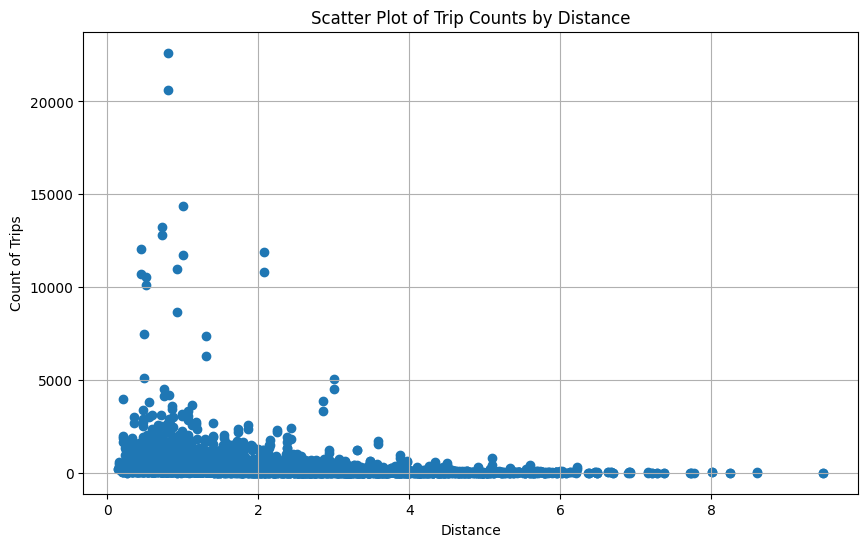

-1 SD Equivalent Weibull: 0.9055329836416123 km
+1 SD Equivalent Weibull: 3.5777849252169105 km


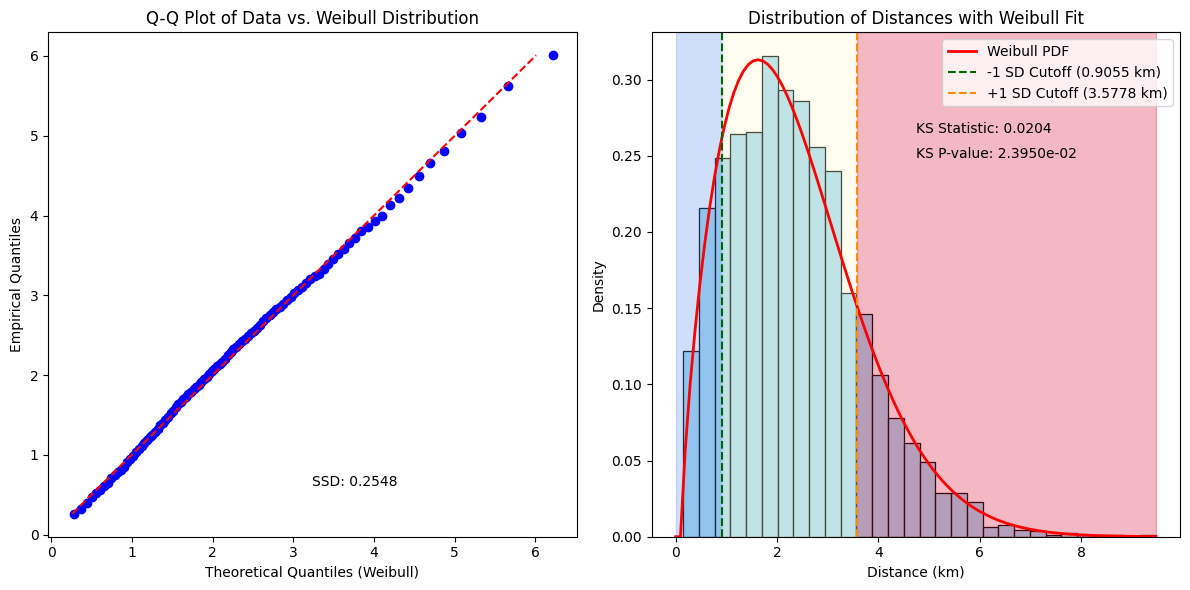

In [ ]:
#It is clear from our analysis that weibull is going to be the best for our data
#Logically from our use case there is a clear next step:
#We should only inlude distances where there has been an actual trip in our dataset
#We first need to fix the cleaned_metrobike_trips dataset to only ones that actually have trips
#From the 75 confirmed active and valid kiosks.
#Then we need to only considers distances between kiosks that have actual trips (there should be a minium requrired number of trips)

trips_between_kiosks_df = pd.read_json('../../dist/data/processed/trips_between_kiosks.json')

trips_between_kiosks_df.rename(columns={'Checkout Kiosk ID': 'Start_Kiosk_ID', 'Return Kiosk ID': 'End_Kiosk_ID'}, inplace=True)

# This operation not only gives us the count of trips between kiosks, but also ensures that we drop
# Start and end kiosks that do not have any trips between them

trips_between_kiosks_df = trips_between_kiosks_df.merge(distance_df[['Start_Kiosk_ID', 'End_Kiosk_ID', 'Distance']], 
                                                        on=['Start_Kiosk_ID', 'End_Kiosk_ID'], 
                                                        how='left')

trips_between_kiosks_df = trips_between_kiosks_df[trips_between_kiosks_df['Count'] > 2]

display(trips_between_kiosks_df)

# Extracting distance data
data = trips_between_kiosks_df['Distance']

# Weibull distribution fitting
weibull_min_params = stats.weibull_min.fit(data)
shape_param, loc, scale_param = weibull_min_params

shape_param, scale_param

# Perform KS test
weibull_min_ks_statistic, weibull_min_ks_pvalue = stats.kstest(data, 'weibull_min', args=weibull_min_params)

print(f"Weibull-min KS Statistic: {weibull_min_ks_statistic}")
print(f"Weibull-min KS P-value: {weibull_min_ks_pvalue}")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(trips_between_kiosks_df['Distance'], trips_between_kiosks_df['Count'])
plt.xlabel('Distance')
plt.ylabel('Count of Trips')
plt.title('Scatter Plot of Trip Counts by Distance')
plt.grid(True)
plt.show()

# Function to calculate cutoffs
def weibull_cutoffs(shape, scale, lower_percentile, upper_percentile):
    lower_cutoff = weibull_min.ppf(lower_percentile, shape, scale=scale)
    upper_cutoff = weibull_min.ppf(upper_percentile, shape, scale=scale)
    return lower_cutoff, upper_cutoff

# Calculate cutoffs for -1 SD and +1 SD equivalent in Weibull distribution
minus_one_sd_cutoff, plus_one_sd_cutoff = weibull_cutoffs(shape_param, scale_param, 0.159, 0.841)

print(f"-1 SD Equivalent Weibull: {minus_one_sd_cutoff} km")
print(f"+1 SD Equivalent Weibull: {plus_one_sd_cutoff} km")

################# BOOTSTRAPPING #################

# bootstrap_samples = 100
# weibull_min_bootstrap_results = []

# for i in range(bootstrap_samples):
#     weibull_sample = data.sample(len(data), replace=True)
#     weibull_min_params = stats.weibull_min.fit(weibull_sample)
#     weibull_min_ks_statistic, weibull_min_ks_pvalue = stats.kstest(weibull_sample, 'weibull_min', args=weibull_min_params)
#     weibull_min_bootstrap_results.append(weibull_min_ks_pvalue)

#     # Print a statement every 100 iterations to track progress
#     if (i+1) % 20 == 0:
#         print(f"Completed {i+1} out of {bootstrap_samples} bootstrap iterations.")

# # Assess the distribution of p-values
# p_value_mean = np.mean(weibull_min_bootstrap_results)

# print(f"Mean p-value from bootstrapping: {p_value_mean}")

################# PLOTS #################

# Prepare data for the Weibull Q-Q plot
weibull_quantiles = stats.weibull_min.ppf(np.linspace(0.01, 0.99, 100), *weibull_min_params)
data_quantiles = np.percentile(data, np.linspace(1, 99, 100))

# Calculate the sum of squared differences for Weibull
ssd_weibull = np.sum((weibull_quantiles - data_quantiles)**2)

# Create a figure with 2 subplots
plt.figure(figsize=(12, 6))

# Weibull Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(weibull_quantiles, data_quantiles, color='blue')
plt.plot([min(data_quantiles), max(data_quantiles)], [min(data_quantiles), max(data_quantiles)], 'r--')
plt.xlabel('Theoretical Quantiles (Weibull)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot of Data vs. Weibull Distribution')
plt.text(0.5, 0.1, f"SSD: {ssd_weibull:.4f}", transform=plt.gca().transAxes)

# Histogram with Weibull PDF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(data, kde=False, bins=30, stat='density', color='skyblue')
x = np.linspace(0, data.max(), 100)
y = weibull_min.pdf(x, *weibull_min_params)
plt.plot(x, y, 'r-', lw=2, label='Weibull PDF')
plt.axvline(minus_one_sd_cutoff, color='darkgreen', linestyle='--', 
            label=f'-1 SD Cutoff ({minus_one_sd_cutoff:.4f} km)')
plt.axvline(plus_one_sd_cutoff, color='darkorange', linestyle='--', 
            label=f'+1 SD Cutoff ({plus_one_sd_cutoff:.4f} km)')
plt.axvspan(0, minus_one_sd_cutoff, color='#6495ED', alpha=0.3)
plt.axvspan(minus_one_sd_cutoff, plus_one_sd_cutoff, color='#FFFACD', alpha=0.3)
plt.axvspan(plus_one_sd_cutoff, data.max(), color='#DC143C', alpha=0.3)
plt.title('Distribution of Distances with Weibull Fit')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.legend()


# Add KS statistic and p-value text
plt.text(0.5, 0.8, f"KS Statistic: {weibull_min_ks_statistic:.4f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f"KS P-value: {weibull_min_ks_pvalue:.4e}", transform=plt.gca().transAxes)
# plt.text(0.5, 0.7, f"Mean Bootstrapping P-value: {p_value_mean:.4e}", transform=plt.gca().transAxes)

# Show the combined plot
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20864\2450557602.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


,Count_Cutoff,Shape,Scale,KS_Statistic,KS_Pvalue,Retained_Rows,Unique_Start_Kiosk_IDs,Unique_End_Kiosk_IDs
0,0,1.709918,2.529794,0.020238,0.025075,5329,74,74
1,1,1.712511,2.523310,0.020351,0.024175,5314,74,74
2,2,1.719579,2.510559,0.020430,0.023950,5284,74,74
3,3,1.720765,2.499731,0.020326,0.025806,5248,74,74
4,4,1.727930,2.490435,0.020301,0.026647,5222,74,74
...,...,...,...,...,...,...,...,...
74,74,1.656116,1.883218,0.022894,0.098120,2861,74,74
75,75,1.652861,1.879925,0.022966,0.098248,2842,74,74
76,76,1.653693,1.871641,0.023549,0.086357,2819,74,74
77,77,1.655779,1.871267,0.023669,0.085340,2801,74,74


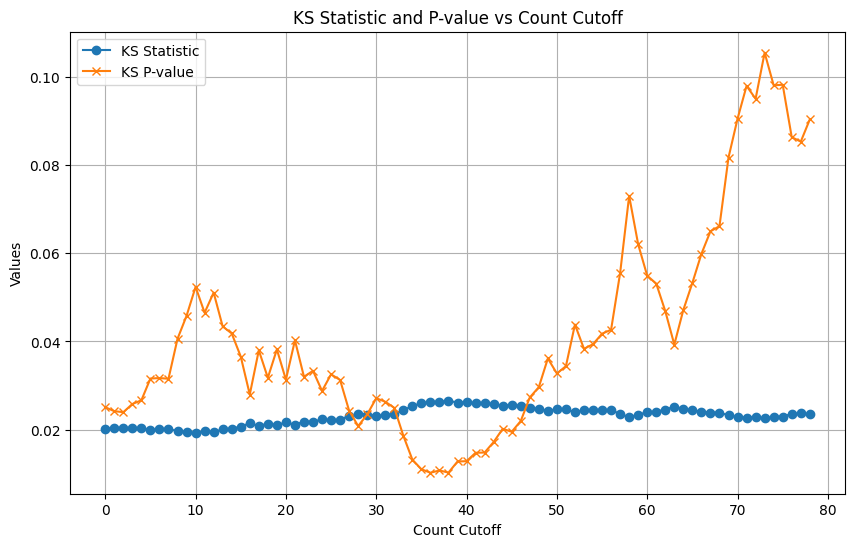

In [ ]:
# Load dataframe
trips_between_kiosks_df = pd.read_json('../../dist/data/processed/trips_between_kiosks.json')
trips_between_kiosks_df.rename(columns={'Checkout Kiosk ID': 'Start_Kiosk_ID', 'Return Kiosk ID': 'End_Kiosk_ID'}, inplace=True)

# Assuming distance_df is defined somewhere else in your code
# Merge with distance_df
trips_between_kiosks_df = trips_between_kiosks_df.merge(distance_df[['Start_Kiosk_ID', 'End_Kiosk_ID', 'Distance']], 
                                                        on=['Start_Kiosk_ID', 'End_Kiosk_ID'], 
                                                        how='left')

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Count_Cutoff', 'Shape', 'Scale', 'KS_Statistic', 'KS_Pvalue', 'Retained_Rows', 'Unique_Start_Kiosk_IDs', 'Unique_End_Kiosk_IDs'])

# Loop over the range of counts and filter data
for count in range(0, 79):
    filtered_df = trips_between_kiosks_df[trips_between_kiosks_df['Count'] > count]
    
    # If the filtered dataframe is not empty, proceed with analysis
    if not filtered_df.empty:
        # Extracting distance data
        data = filtered_df['Distance']

        # Weibull distribution fitting
        shape_param, loc, scale_param = stats.weibull_min.fit(data)

        # Perform KS test
        ks_statistic, ks_pvalue = stats.kstest(data, 'weibull_min', args=(shape_param, loc, scale_param))

        # Count unique Start_Kiosk_ID and End_Kiosk_ID
        unique_start_ids = filtered_df['Start_Kiosk_ID'].nunique()
        unique_end_ids = filtered_df['End_Kiosk_ID'].nunique()

        # Create a new row with results, including the number of rows retained and unique IDs count
        new_row = pd.DataFrame({'Count_Cutoff': [count], 
                                'Shape': [shape_param], 
                                'Scale': [scale_param], 
                                'KS_Statistic': [ks_statistic], 
                                'KS_Pvalue': [ks_pvalue],
                                'Retained_Rows': [len(filtered_df)],
                                'Unique_Start_Kiosk_IDs': [unique_start_ids],
                                'Unique_End_Kiosk_IDs': [unique_end_ids]})

        # Check if new_row is empty or contains all NA values before concatenation
        if not new_row.dropna().empty:
            results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results
display(results_df)

#I want to note an observation, as we set the restrain to only retain rows with higher trips between them, we fit a weibull distribution extremely well.
#This indicates that we should consider clustering our kiosks into different regions to achieve better fits.
# In other words, our model would get better if we split the entire city into mobility zones while retaining the overall city model
# To observe how well our city is connected overall

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Count_Cutoff'], results_df['KS_Statistic'], label='KS Statistic', marker='o')
plt.plot(results_df['Count_Cutoff'], results_df['KS_Pvalue'], label='KS P-value', marker='x')
plt.xlabel('Count Cutoff')
plt.ylabel('Values')
plt.title('KS Statistic and P-value vs Count Cutoff')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20864\3238498204.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Processed row with Count Cutoff: 0
Processed row with Count Cutoff: 1
Processed row with Count Cutoff: 2
Processed row with Count Cutoff: 3
Processed row with Count Cutoff: 4
Processed row with Count Cutoff: 5
Processed row with Count Cutoff: 6
Processed row with Count Cutoff: 7
Processed row with Count Cutoff: 8
Processed row with Count Cutoff: 9
Processed row with Count Cutoff: 10
Processed row with Count Cutoff: 11
Processed row with Count Cutoff: 12
Processed row with Count Cutoff: 13
Processed row with Count Cutoff: 14
Processed row with Count Cutoff: 15
Processed row with Count Cutoff: 16
Processed row with Count Cutoff: 17
Processed row with Count Cutoff: 18
Processed row with Count Cutoff: 19
Processed row with Count Cutoff: 20
Processed row with Count Cutoff: 21
Processed row with Count Cutoff: 22
Processed row with Count Cutoff: 23
Processed row with Count Cutoff: 24
Processed row with Count Cutoff: 25
Processed row with Count Cutoff: 26
Processed row with Count Cutoff: 27
Pr

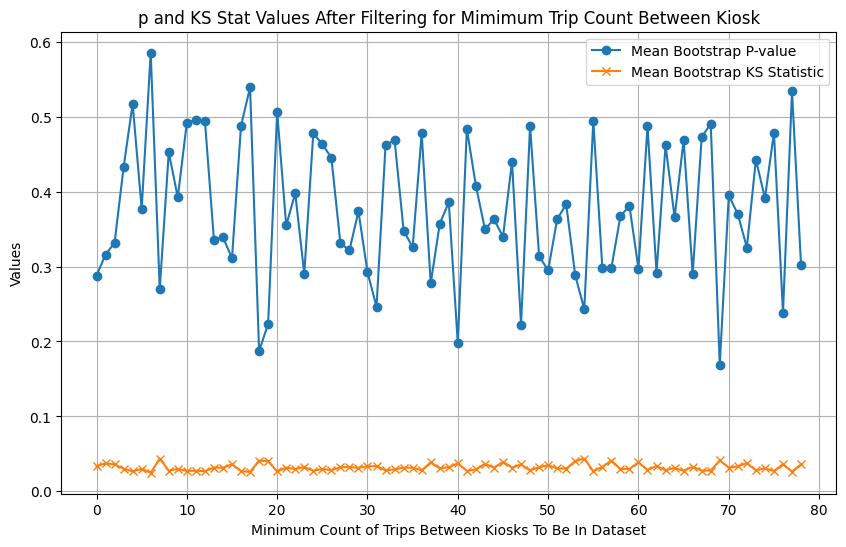

,Count_Cutoff,Shape,Scale,KS_Statistic,KS_Pvalue,Retained_Rows,Unique_Start_Kiosk_IDs,Unique_End_Kiosk_IDs,Mean_Bootstrap_Pvalue,Mean_Bootstrap_KS_Statistic
0,0,0.976990,2.006113,0.022930,0.660385,1000,10,10,0.287900,0.033398
1,1,0.994307,2.050961,0.023260,0.642754,1000,10,10,0.315992,0.037335
2,2,0.980152,2.073463,0.022190,0.699731,1000,10,10,0.331614,0.036000
3,3,1.038495,2.064546,0.019973,0.812176,1000,10,10,0.432401,0.030172
4,4,1.003839,1.968022,0.011696,0.998967,1000,10,10,0.517141,0.026696
...,...,...,...,...,...,...,...,...,...,...
74,74,0.958703,1.889068,0.019156,0.849494,1000,10,10,0.391186,0.030794
75,75,1.023097,1.928341,0.019711,0.824453,1000,10,10,0.478775,0.027034
76,76,1.006720,1.921566,0.029685,0.334937,1000,10,10,0.238578,0.036309
77,77,0.979892,1.905919,0.010995,0.999648,1000,10,10,0.534010,0.026351


In [37]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=[
    'Count_Cutoff', 'Shape', 'Scale', 'KS_Statistic', 'KS_Pvalue', 
    'Retained_Rows', 'Unique_Start_Kiosk_IDs', 'Unique_End_Kiosk_IDs', 'Mean_Bootstrap_Pvalue', 'Mean_Bootstrap_KS_Statistic'
])

# Number of bootstrap samples
bootstrap_samples = 100

# Loop over the range of counts and filter data
for count in range(0, 79):
    # Sample filtered_df setup (replace with actual filtering)
    filtered_df = pd.DataFrame({'Distance': np.random.exponential(scale=2.0, size=1000)})

    # If the filtered dataframe is not empty, proceed with analysis
    if not filtered_df.empty:
        # Extracting distance data
        data = filtered_df['Distance']

        # Weibull distribution fitting
        shape_param, loc, scale_param = stats.weibull_min.fit(data)

        # Perform KS test
        ks_statistic, ks_pvalue = stats.kstest(data, 'weibull_min', args=(shape_param, loc, scale_param))

        # Bootstrap analysis for p-value and KS statistic
        bootstrap_pvalues = []
        bootstrap_ks_statistics = []
        for _ in range(bootstrap_samples):
            bootstrap_sample = data.sample(len(data), replace=True)
            bootstrap_params = stats.weibull_min.fit(bootstrap_sample)
            bootstrap_ks_statistic, bootstrap_pvalue = stats.kstest(bootstrap_sample, 'weibull_min', args=bootstrap_params)
            bootstrap_pvalues.append(bootstrap_pvalue)
            bootstrap_ks_statistics.append(bootstrap_ks_statistic)
        mean_bootstrap_pvalue = np.mean(bootstrap_pvalues)
        mean_bootstrap_ks_statistic = np.mean(bootstrap_ks_statistics)

        # Create a new row with results, including the number of rows retained, unique IDs count, and mean bootstrap values
        new_row = pd.DataFrame({
            'Count_Cutoff': [count], 
            'Shape': [shape_param], 
            'Scale': [scale_param], 
            'KS_Statistic': [ks_statistic], 
            'KS_Pvalue': [ks_pvalue],
            'Retained_Rows': [len(filtered_df)],  # Sample data, replace with actual count
            'Unique_Start_Kiosk_IDs': [10],  # Sample data, replace with actual count
            'Unique_End_Kiosk_IDs': [10],  # Sample data, replace with actual count
            'Mean_Bootstrap_Pvalue': [mean_bootstrap_pvalue],
            'Mean_Bootstrap_KS_Statistic': [mean_bootstrap_ks_statistic]
        })

        # Check if new_row is empty or contains all NA values before concatenation
        if not new_row.dropna().empty:
            results_df = pd.concat([results_df, new_row], ignore_index=True)

        # Print message after processing each row
        print(f"Processed row with Count Cutoff: {count}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Count_Cutoff'], results_df['Mean_Bootstrap_Pvalue'], label='Mean Bootstrap P-value', marker='o')
plt.plot(results_df['Count_Cutoff'], results_df['Mean_Bootstrap_KS_Statistic'], label='Mean Bootstrap KS Statistic', marker='x')
plt.xlabel('Minimum Count of Trips Between Kiosks To Be In Dataset')
plt.ylabel('Values')
plt.title('p and KS Stat Values After Filtering for Mimimum Trip Count Between Kiosk')
plt.legend()
plt.grid(True)
plt.show()

display(results_df)

In [39]:
print(results_df['Mean_Bootstrap_Pvalue'].mean())
print(results_df['Mean_Bootstrap_KS_Statistic'].mean())

0.37666508458761416
0.03200545022723789
